In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data=load_iris()

In [2]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df= df.astype(float)

In [3]:
df['y']= data.target
df['y']= df.y.replace(dict(enumerate(data.target_names)))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
Y=pd.get_dummies(df['y'],prefix='Y')
Y

,Y_setosa,Y_versicolor,Y_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [5]:
df = pd.concat([df,Y],axis=1)
df.drop(['y'],axis=1,inplace=True)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y_setosa,Y_versicolor,Y_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [7]:
X_data=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
X_data=np.asarray(X_data)
Y_data=df[['Y_setosa','Y_versicolor','Y_virginica']]
Y_data=np.asarray(Y_data)

In [8]:
X_data.shape,Y_data.shape

((150, 4), (150, 3))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
m=Sequential()
m.add(Dense(64,input_shape=(4,),activation='relu'))
m.add(Dense(128,activation='relu'))
m.add(Dense(128,activation='relu'))
m.add(Dense(64,activation='relu'))
m.add(Dense(64,activation='relu'))
m.add(Dense(3,activation='softmax'))
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 37,763
Trainable params: 37,763
Non-trainable params: 0
____________________________________________________

In [10]:
t_x, tt_x,t_y,tt_y = train_test_split(X_data,Y_data,test_size=0.2,random_state=1)

In [11]:
t_x.shape

(120, 4)

In [12]:
m.compile(optimizer='adam',loss='categorical_crossentropy'
         ,metrics=['accuracy'])
hy=m.fit(t_x,t_y,validation_data=(tt_x,tt_y),batch_size=40,epochs=1000,verbose=2)

Epoch 1/1000
3/3 - 1s - loss: 1.0633 - accuracy: 0.3667 - val_loss: 1.0259 - val_accuracy: 0.2000
Epoch 2/1000
3/3 - 0s - loss: 0.9399 - accuracy: 0.5333 - val_loss: 0.9158 - val_accuracy: 0.5667
Epoch 3/1000
3/3 - 0s - loss: 0.8441 - accuracy: 0.6917 - val_loss: 0.8539 - val_accuracy: 0.5667
Epoch 4/1000
3/3 - 0s - loss: 0.7563 - accuracy: 0.6917 - val_loss: 0.7792 - val_accuracy: 0.5667
Epoch 5/1000
3/3 - 0s - loss: 0.6625 - accuracy: 0.6917 - val_loss: 0.6545 - val_accuracy: 0.5667
Epoch 6/1000
3/3 - 0s - loss: 0.5681 - accuracy: 0.7083 - val_loss: 0.5447 - val_accuracy: 0.7333
Epoch 7/1000
3/3 - 0s - loss: 0.4977 - accuracy: 0.9500 - val_loss: 0.4630 - val_accuracy: 0.8667
Epoch 8/1000
3/3 - 0s - loss: 0.4133 - accuracy: 0.8500 - val_loss: 0.4493 - val_accuracy: 0.7333
Epoch 9/1000
3/3 - 0s - loss: 0.3549 - accuracy: 0.9167 - val_loss: 0.3481 - val_accuracy: 0.9667
Epoch 10/1000
3/3 - 0s - loss: 0.2929 - accuracy: 0.9667 - val_loss: 0.3346 - val_accuracy: 0.8667
Epoch 11/1000
3/3 -

Epoch 84/1000
3/3 - 0s - loss: 0.0714 - accuracy: 0.9750 - val_loss: 0.0696 - val_accuracy: 0.9667
Epoch 85/1000
3/3 - 0s - loss: 0.0741 - accuracy: 0.9750 - val_loss: 0.0591 - val_accuracy: 1.0000
Epoch 86/1000
3/3 - 0s - loss: 0.0734 - accuracy: 0.9750 - val_loss: 0.0600 - val_accuracy: 1.0000
Epoch 87/1000
3/3 - 0s - loss: 0.0683 - accuracy: 0.9750 - val_loss: 0.0615 - val_accuracy: 0.9667
Epoch 88/1000
3/3 - 0s - loss: 0.0722 - accuracy: 0.9750 - val_loss: 0.0602 - val_accuracy: 0.9667
Epoch 89/1000
3/3 - 0s - loss: 0.0847 - accuracy: 0.9500 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 90/1000
3/3 - 0s - loss: 0.0736 - accuracy: 0.9667 - val_loss: 0.0667 - val_accuracy: 0.9667
Epoch 91/1000
3/3 - 0s - loss: 0.0695 - accuracy: 0.9750 - val_loss: 0.0529 - val_accuracy: 1.0000
Epoch 92/1000
3/3 - 0s - loss: 0.0668 - accuracy: 0.9833 - val_loss: 0.0516 - val_accuracy: 1.0000
Epoch 93/1000
3/3 - 0s - loss: 0.0679 - accuracy: 0.9750 - val_loss: 0.0513 - val_accuracy: 1.0000
Epoch 94/1

Epoch 167/1000
3/3 - 0s - loss: 0.0742 - accuracy: 0.9667 - val_loss: 0.0402 - val_accuracy: 1.0000
Epoch 168/1000
3/3 - 0s - loss: 0.0601 - accuracy: 0.9833 - val_loss: 0.0544 - val_accuracy: 0.9667
Epoch 169/1000
3/3 - 0s - loss: 0.0687 - accuracy: 0.9750 - val_loss: 0.0432 - val_accuracy: 1.0000
Epoch 170/1000
3/3 - 0s - loss: 0.0635 - accuracy: 0.9750 - val_loss: 0.0407 - val_accuracy: 1.0000
Epoch 171/1000
3/3 - 0s - loss: 0.0721 - accuracy: 0.9583 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 172/1000
3/3 - 0s - loss: 0.0688 - accuracy: 0.9750 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 173/1000
3/3 - 0s - loss: 0.0610 - accuracy: 0.9833 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 174/1000
3/3 - 0s - loss: 0.0620 - accuracy: 0.9750 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 175/1000
3/3 - 0s - loss: 0.0655 - accuracy: 0.9750 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 176/1000
3/3 - 0s - loss: 0.0656 - accuracy: 0.9667 - val_loss: 0.0339 - val_accuracy: 1.0000


Epoch 249/1000
3/3 - 0s - loss: 0.0579 - accuracy: 0.9750 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 250/1000
3/3 - 0s - loss: 0.0591 - accuracy: 0.9833 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 251/1000
3/3 - 0s - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 252/1000
3/3 - 0s - loss: 0.0558 - accuracy: 0.9833 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 253/1000
3/3 - 0s - loss: 0.0652 - accuracy: 0.9750 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 254/1000
3/3 - 0s - loss: 0.0630 - accuracy: 0.9667 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 255/1000
3/3 - 0s - loss: 0.0583 - accuracy: 0.9750 - val_loss: 0.0551 - val_accuracy: 0.9667
Epoch 256/1000
3/3 - 0s - loss: 0.0675 - accuracy: 0.9750 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 257/1000
3/3 - 0s - loss: 0.0637 - accuracy: 0.9667 - val_loss: 0.0321 - val_accuracy: 1.0000
Epoch 258/1000
3/3 - 0s - loss: 0.0639 - accuracy: 0.9750 - val_loss: 0.0273 - val_accuracy: 1.0000


Epoch 331/1000
3/3 - 0s - loss: 0.0665 - accuracy: 0.9833 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 332/1000
3/3 - 0s - loss: 0.0561 - accuracy: 0.9750 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 333/1000
3/3 - 0s - loss: 0.0653 - accuracy: 0.9750 - val_loss: 0.0384 - val_accuracy: 1.0000
Epoch 334/1000
3/3 - 0s - loss: 0.0605 - accuracy: 0.9750 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 335/1000
3/3 - 0s - loss: 0.0715 - accuracy: 0.9750 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 336/1000
3/3 - 0s - loss: 0.0483 - accuracy: 0.9917 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 337/1000
3/3 - 0s - loss: 0.0661 - accuracy: 0.9750 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 338/1000
3/3 - 0s - loss: 0.0532 - accuracy: 0.9833 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 339/1000
3/3 - 0s - loss: 0.0581 - accuracy: 0.9833 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 340/1000
3/3 - 0s - loss: 0.0594 - accuracy: 0.9750 - val_loss: 0.0214 - val_accuracy: 1.0000


Epoch 413/1000
3/3 - 0s - loss: 0.0469 - accuracy: 0.9833 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 414/1000
3/3 - 0s - loss: 0.0479 - accuracy: 0.9833 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 415/1000
3/3 - 0s - loss: 0.0439 - accuracy: 0.9833 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 416/1000
3/3 - 0s - loss: 0.0480 - accuracy: 0.9833 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 417/1000
3/3 - 0s - loss: 0.0425 - accuracy: 0.9917 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 418/1000
3/3 - 0s - loss: 0.0427 - accuracy: 0.9917 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 419/1000
3/3 - 0s - loss: 0.0414 - accuracy: 0.9917 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 420/1000
3/3 - 0s - loss: 0.0456 - accuracy: 0.9833 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 421/1000
3/3 - 0s - loss: 0.0401 - accuracy: 0.9917 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 422/1000
3/3 - 0s - loss: 0.0423 - accuracy: 0.9917 - val_loss: 0.0081 - val_accuracy: 1.0000


Epoch 495/1000
3/3 - 0s - loss: 0.0379 - accuracy: 0.9917 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 496/1000
3/3 - 0s - loss: 0.0401 - accuracy: 0.9833 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 497/1000
3/3 - 0s - loss: 0.0397 - accuracy: 0.9833 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 498/1000
3/3 - 0s - loss: 0.0353 - accuracy: 0.9917 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 499/1000
3/3 - 0s - loss: 0.0396 - accuracy: 0.9917 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 500/1000
3/3 - 0s - loss: 0.0366 - accuracy: 0.9917 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 501/1000
3/3 - 0s - loss: 0.0391 - accuracy: 0.9917 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 502/1000
3/3 - 0s - loss: 0.0369 - accuracy: 0.9917 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 503/1000
3/3 - 0s - loss: 0.0363 - accuracy: 0.9917 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 504/1000
3/3 - 0s - loss: 0.0400 - accuracy: 0.9917 - val_loss: 0.0080 - val_accuracy: 1.0000


Epoch 577/1000
3/3 - 0s - loss: 0.0377 - accuracy: 0.9917 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 578/1000
3/3 - 0s - loss: 0.0382 - accuracy: 0.9917 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 579/1000
3/3 - 0s - loss: 0.0389 - accuracy: 0.9917 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 580/1000
3/3 - 0s - loss: 0.0362 - accuracy: 0.9917 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 581/1000
3/3 - 0s - loss: 0.0375 - accuracy: 0.9917 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 582/1000
3/3 - 0s - loss: 0.0367 - accuracy: 0.9917 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 583/1000
3/3 - 0s - loss: 0.0362 - accuracy: 0.9917 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 584/1000
3/3 - 0s - loss: 0.0383 - accuracy: 0.9917 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 585/1000
3/3 - 0s - loss: 0.0394 - accuracy: 0.9917 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 586/1000
3/3 - 0s - loss: 0.0370 - accuracy: 0.9917 - val_loss: 0.0050 - val_accuracy: 1.0000


Epoch 659/1000
3/3 - 0s - loss: 0.0372 - accuracy: 0.9917 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 660/1000
3/3 - 0s - loss: 0.0348 - accuracy: 0.9917 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 661/1000
3/3 - 0s - loss: 0.0354 - accuracy: 0.9917 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 662/1000
3/3 - 0s - loss: 0.0343 - accuracy: 0.9917 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 663/1000
3/3 - 0s - loss: 0.0359 - accuracy: 0.9917 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 664/1000
3/3 - 0s - loss: 0.0339 - accuracy: 0.9917 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 665/1000
3/3 - 0s - loss: 0.0340 - accuracy: 0.9917 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 666/1000
3/3 - 0s - loss: 0.0349 - accuracy: 0.9917 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 667/1000
3/3 - 0s - loss: 0.0340 - accuracy: 0.9917 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 668/1000
3/3 - 0s - loss: 0.0336 - accuracy: 0.9917 - val_loss: 0.0053 - val_accuracy: 1.0000


Epoch 741/1000
3/3 - 0s - loss: 0.0665 - accuracy: 0.9750 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 742/1000
3/3 - 0s - loss: 0.0334 - accuracy: 0.9917 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 743/1000
3/3 - 0s - loss: 0.0414 - accuracy: 0.9833 - val_loss: 0.0312 - val_accuracy: 0.9667
Epoch 744/1000
3/3 - 0s - loss: 0.0459 - accuracy: 0.9833 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 745/1000
3/3 - 0s - loss: 0.0437 - accuracy: 0.9833 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 746/1000
3/3 - 0s - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 747/1000
3/3 - 0s - loss: 0.0351 - accuracy: 0.9917 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 748/1000
3/3 - 0s - loss: 0.0335 - accuracy: 0.9917 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 749/1000
3/3 - 0s - loss: 0.0308 - accuracy: 0.9917 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 750/1000
3/3 - 0s - loss: 0.0384 - accuracy: 0.9917 - val_loss: 0.0032 - val_accuracy: 1.0000


Epoch 823/1000
3/3 - 0s - loss: 0.0219 - accuracy: 0.9917 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 824/1000
3/3 - 0s - loss: 0.0241 - accuracy: 0.9917 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 825/1000
3/3 - 0s - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 826/1000
3/3 - 0s - loss: 0.0224 - accuracy: 0.9917 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 827/1000
3/3 - 0s - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 828/1000
3/3 - 0s - loss: 0.0211 - accuracy: 0.9917 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 829/1000
3/3 - 0s - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 830/1000
3/3 - 0s - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 831/1000
3/3 - 0s - loss: 0.0285 - accuracy: 0.9833 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 832/1000
3/3 - 0s - loss: 0.0247 - accuracy: 0.9917 - val_loss: 0.0042 - val_accuracy: 1.0000


Epoch 905/1000
3/3 - 0s - loss: 0.0317 - accuracy: 0.9833 - val_loss: 0.0348 - val_accuracy: 1.0000
Epoch 906/1000
3/3 - 0s - loss: 0.0297 - accuracy: 0.9833 - val_loss: 0.0544 - val_accuracy: 0.9667
Epoch 907/1000
3/3 - 0s - loss: 0.0261 - accuracy: 0.9833 - val_loss: 0.0516 - val_accuracy: 0.9667
Epoch 908/1000
3/3 - 0s - loss: 0.0304 - accuracy: 0.9833 - val_loss: 0.0427 - val_accuracy: 1.0000
Epoch 909/1000
3/3 - 0s - loss: 0.0357 - accuracy: 0.9833 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 910/1000
3/3 - 0s - loss: 0.0343 - accuracy: 0.9833 - val_loss: 0.0750 - val_accuracy: 0.9667
Epoch 911/1000
3/3 - 0s - loss: 0.0773 - accuracy: 0.9667 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 912/1000
3/3 - 0s - loss: 0.0692 - accuracy: 0.9667 - val_loss: 0.6133 - val_accuracy: 0.7667
Epoch 913/1000
3/3 - 0s - loss: 0.2243 - accuracy: 0.9333 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 914/1000
3/3 - 0s - loss: 0.1455 - accuracy: 0.9333 - val_loss: 0.0551 - val_accuracy: 1.0000


Epoch 987/1000
3/3 - 0s - loss: 0.0320 - accuracy: 0.9917 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 988/1000
3/3 - 0s - loss: 0.0341 - accuracy: 0.9750 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 989/1000
3/3 - 0s - loss: 0.0333 - accuracy: 0.9917 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 990/1000
3/3 - 0s - loss: 0.0466 - accuracy: 0.9833 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 991/1000
3/3 - 0s - loss: 0.0507 - accuracy: 0.9833 - val_loss: 0.1196 - val_accuracy: 0.9667
Epoch 992/1000
3/3 - 0s - loss: 0.0705 - accuracy: 0.9750 - val_loss: 0.0822 - val_accuracy: 0.9667
Epoch 993/1000
3/3 - 0s - loss: 0.0910 - accuracy: 0.9583 - val_loss: 0.1097 - val_accuracy: 0.9667
Epoch 994/1000
3/3 - 0s - loss: 0.0637 - accuracy: 0.9833 - val_loss: 0.1255 - val_accuracy: 0.9667
Epoch 995/1000
3/3 - 0s - loss: 0.0665 - accuracy: 0.9750 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 996/1000
3/3 - 0s - loss: 0.0533 - accuracy: 0.9750 - val_loss: 0.0069 - val_accuracy: 1.0000


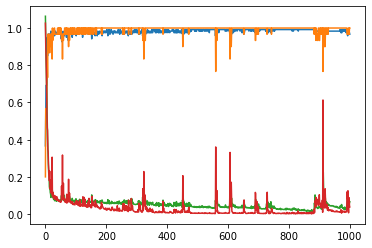

In [13]:
import matplotlib.pyplot as plt
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [14]:
m.evaluate(tt_x,tt_y)

1/1 [==============================] - 0s 11ms/step - loss: 0.0383 - accuracy: 1.0000


[0.03825552016496658, 1.0]

In [15]:
from tensorflow.keras.initializers import RandomNormal, Constant
m2=Sequential()
m2.add(Dense(64,input_shape=(4,),activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(128,activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(128,activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(64,activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(64,activation='relu'))
m2.add(BatchNormalization(momentum=0.95,epsilon=0.005,
                          beta_initializer=RandomNormal(mean=0.0,stddev=0.05),
                          gamma_initializer=Constant(value=0.9)))
m2.add(Dense(3,activation='softmax'))
m2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [16]:
m2.compile(optimizer='adam',loss='categorical_crossentropy'
         ,metrics=['accuracy'])
hy2=m2.fit(t_x,t_y,validation_data=(tt_x,tt_y),batch_size=40,epochs=1000,verbose=2)

Epoch 1/1000
3/3 - 1s - loss: 1.0951 - accuracy: 0.4583 - val_loss: 1.0376 - val_accuracy: 0.2333
Epoch 2/1000
3/3 - 0s - loss: 0.3155 - accuracy: 0.9083 - val_loss: 1.0701 - val_accuracy: 0.2000
Epoch 3/1000
3/3 - 0s - loss: 0.1446 - accuracy: 0.9667 - val_loss: 1.1163 - val_accuracy: 0.2000
Epoch 4/1000
3/3 - 0s - loss: 0.0984 - accuracy: 0.9833 - val_loss: 1.1701 - val_accuracy: 0.2000
Epoch 5/1000
3/3 - 0s - loss: 0.0708 - accuracy: 0.9833 - val_loss: 1.2150 - val_accuracy: 0.2000
Epoch 6/1000
3/3 - 0s - loss: 0.0736 - accuracy: 0.9833 - val_loss: 1.2392 - val_accuracy: 0.2000
Epoch 7/1000
3/3 - 0s - loss: 0.0492 - accuracy: 0.9917 - val_loss: 1.2584 - val_accuracy: 0.2000
Epoch 8/1000
3/3 - 0s - loss: 0.0359 - accuracy: 0.9917 - val_loss: 1.2756 - val_accuracy: 0.2000
Epoch 9/1000
3/3 - 0s - loss: 0.0456 - accuracy: 0.9833 - val_loss: 1.2941 - val_accuracy: 0.2000
Epoch 10/1000
3/3 - 0s - loss: 0.0256 - accuracy: 1.0000 - val_loss: 1.3101 - val_accuracy: 0.2000
Epoch 11/1000
3/3 -

Epoch 84/1000
3/3 - 0s - loss: 0.0323 - accuracy: 0.9833 - val_loss: 0.7902 - val_accuracy: 0.7333
Epoch 85/1000
3/3 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.7984 - val_accuracy: 0.7333
Epoch 86/1000
3/3 - 0s - loss: 0.0145 - accuracy: 0.9917 - val_loss: 0.8875 - val_accuracy: 0.6333
Epoch 87/1000
3/3 - 0s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.9381 - val_accuracy: 0.6333
Epoch 88/1000
3/3 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.9574 - val_accuracy: 0.6333
Epoch 89/1000
3/3 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.9611 - val_accuracy: 0.6333
Epoch 90/1000
3/3 - 0s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.9627 - val_accuracy: 0.6333
Epoch 91/1000
3/3 - 0s - loss: 0.0149 - accuracy: 0.9917 - val_loss: 0.8669 - val_accuracy: 0.7000
Epoch 92/1000
3/3 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.6242 - val_accuracy: 0.7667
Epoch 93/1000
3/3 - 0s - loss: 0.0432 - accuracy: 0.9750 - val_loss: 0.6060 - val_accuracy: 0.7667
Epoch 94/1

Epoch 167/1000
3/3 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2381 - val_accuracy: 0.9000
Epoch 168/1000
3/3 - 0s - loss: 0.0081 - accuracy: 0.9917 - val_loss: 0.2103 - val_accuracy: 0.8667
Epoch 169/1000
3/3 - 0s - loss: 0.0159 - accuracy: 0.9917 - val_loss: 0.1501 - val_accuracy: 0.9333
Epoch 170/1000
3/3 - 0s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.1387 - val_accuracy: 0.9667
Epoch 171/1000
3/3 - 0s - loss: 0.0288 - accuracy: 0.9917 - val_loss: 0.2184 - val_accuracy: 0.9000
Epoch 172/1000
3/3 - 0s - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.4124 - val_accuracy: 0.8333
Epoch 173/1000
3/3 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3765 - val_accuracy: 0.8333
Epoch 174/1000
3/3 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3109 - val_accuracy: 0.8333
Epoch 175/1000
3/3 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2567 - val_accuracy: 0.8333
Epoch 176/1000
3/3 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2194 - val_accuracy: 0.9333


Epoch 249/1000
3/3 - 0s - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 250/1000
3/3 - 0s - loss: 0.0113 - accuracy: 0.9917 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 251/1000
3/3 - 0s - loss: 0.0194 - accuracy: 0.9917 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 252/1000
3/3 - 0s - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 253/1000
3/3 - 0s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0430 - val_accuracy: 0.9667
Epoch 254/1000
3/3 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9667
Epoch 255/1000
3/3 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0800 - val_accuracy: 0.9667
Epoch 256/1000
3/3 - 0s - loss: 7.9002e-04 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9667
Epoch 257/1000
3/3 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0424 - val_accuracy: 0.9667
Epoch 258/1000
3/3 - 0s - loss: 5.8442e-04 - accuracy: 1.0000 - val_loss: 0.0319 - val_accuracy:

Epoch 331/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 1.0000
Epoch 332/1000
3/3 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 333/1000
3/3 - 0s - loss: 7.5430e-04 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 334/1000
3/3 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 335/1000
3/3 - 0s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 336/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 337/1000
3/3 - 0s - loss: 8.3915e-04 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 338/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 1.0000
Epoch 339/1000
3/3 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 340/1000
3/3 - 0s - loss: 7.4656e-04 - accuracy: 1.0000 - val_loss: 0.0287 - val_accur

Epoch 413/1000
3/3 - 0s - loss: 2.9179e-04 - accuracy: 1.0000 - val_loss: 0.1956 - val_accuracy: 0.9333
Epoch 414/1000
3/3 - 0s - loss: 7.5081e-04 - accuracy: 1.0000 - val_loss: 0.1847 - val_accuracy: 0.9333
Epoch 415/1000
3/3 - 0s - loss: 4.5759e-04 - accuracy: 1.0000 - val_loss: 0.1759 - val_accuracy: 0.9333
Epoch 416/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1669 - val_accuracy: 0.9333
Epoch 417/1000
3/3 - 0s - loss: 3.6274e-04 - accuracy: 1.0000 - val_loss: 0.1585 - val_accuracy: 0.9333
Epoch 418/1000
3/3 - 0s - loss: 4.8408e-04 - accuracy: 1.0000 - val_loss: 0.1505 - val_accuracy: 0.9333
Epoch 419/1000
3/3 - 0s - loss: 3.5807e-04 - accuracy: 1.0000 - val_loss: 0.1438 - val_accuracy: 0.9333
Epoch 420/1000
3/3 - 0s - loss: 5.8621e-04 - accuracy: 1.0000 - val_loss: 0.1379 - val_accuracy: 0.9333
Epoch 421/1000
3/3 - 0s - loss: 4.4053e-04 - accuracy: 1.0000 - val_loss: 0.1348 - val_accuracy: 0.9000
Epoch 422/1000
3/3 - 0s - loss: 3.3689e-04 - accuracy: 1.0000 - val_

Epoch 494/1000
3/3 - 0s - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1553 - val_accuracy: 0.9667
Epoch 495/1000
3/3 - 0s - loss: 5.0887e-04 - accuracy: 1.0000 - val_loss: 0.1529 - val_accuracy: 0.9667
Epoch 496/1000
3/3 - 0s - loss: 0.0154 - accuracy: 0.9917 - val_loss: 0.1073 - val_accuracy: 0.9667
Epoch 497/1000
3/3 - 0s - loss: 4.9647e-04 - accuracy: 1.0000 - val_loss: 0.0928 - val_accuracy: 0.9333
Epoch 498/1000
3/3 - 0s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1240 - val_accuracy: 0.9333
Epoch 499/1000
3/3 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1615 - val_accuracy: 0.9667
Epoch 500/1000
3/3 - 0s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1348 - val_accuracy: 0.9667
Epoch 501/1000
3/3 - 0s - loss: 6.8012e-04 - accuracy: 1.0000 - val_loss: 0.1187 - val_accuracy: 0.9667
Epoch 502/1000
3/3 - 0s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9667
Epoch 503/1000
3/3 - 0s - loss: 6.2843e-04 - accuracy: 1.0000 - val_loss: 0.0307 - val_a

Epoch 575/1000
3/3 - 0s - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 1.0000
Epoch 576/1000
3/3 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 1.0000
Epoch 577/1000
3/3 - 0s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0378 - val_accuracy: 1.0000
Epoch 578/1000
3/3 - 0s - loss: 4.0373e-04 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 1.0000
Epoch 579/1000
3/3 - 0s - loss: 0.0577 - accuracy: 0.9833 - val_loss: 0.0467 - val_accuracy: 0.9667
Epoch 580/1000
3/3 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0992 - val_accuracy: 0.9667
Epoch 581/1000
3/3 - 0s - loss: 0.0428 - accuracy: 0.9750 - val_loss: 0.1758 - val_accuracy: 0.9667
Epoch 582/1000
3/3 - 0s - loss: 0.0382 - accuracy: 0.9917 - val_loss: 0.1310 - val_accuracy: 0.9667
Epoch 583/1000
3/3 - 0s - loss: 0.0144 - accuracy: 0.9917 - val_loss: 0.0808 - val_accuracy: 0.9667
Epoch 584/1000
3/3 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1411 - val_accuracy: 0.9

Epoch 656/1000
3/3 - 0s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 657/1000
3/3 - 0s - loss: 2.6005e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 658/1000
3/3 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 659/1000
3/3 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 660/1000
3/3 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 661/1000
3/3 - 0s - loss: 8.0048e-04 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 662/1000
3/3 - 0s - loss: 2.5947e-04 - accuracy: 1.0000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 663/1000
3/3 - 0s - loss: 2.3879e-04 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 664/1000
3/3 - 0s - loss: 2.4952e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 665/1000
3/3 - 0s - loss: 6.0935e-04 - accuracy: 1.0000 - val_loss: 0.0081

Epoch 737/1000
3/3 - 0s - loss: 8.1032e-04 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 1.0000
Epoch 738/1000
3/3 - 0s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 739/1000
3/3 - 0s - loss: 3.6972e-04 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 740/1000
3/3 - 0s - loss: 0.0140 - accuracy: 0.9917 - val_loss: 0.0478 - val_accuracy: 0.9667
Epoch 741/1000
3/3 - 0s - loss: 0.0129 - accuracy: 0.9917 - val_loss: 0.1014 - val_accuracy: 0.9667
Epoch 742/1000
3/3 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1508 - val_accuracy: 0.9333
Epoch 743/1000
3/3 - 0s - loss: 0.0133 - accuracy: 0.9917 - val_loss: 0.1420 - val_accuracy: 0.9333
Epoch 744/1000
3/3 - 0s - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0866 - val_accuracy: 0.9667
Epoch 745/1000
3/3 - 0s - loss: 0.0155 - accuracy: 0.9917 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 746/1000
3/3 - 0s - loss: 4.1879e-04 - accuracy: 1.0000 - val_loss: 0.0066 - val_accur

Epoch 819/1000
3/3 - 0s - loss: 3.9079e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 820/1000
3/3 - 0s - loss: 5.0718e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 821/1000
3/3 - 0s - loss: 2.6086e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 822/1000
3/3 - 0s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 823/1000
3/3 - 0s - loss: 5.8016e-04 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 824/1000
3/3 - 0s - loss: 7.4093e-04 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 825/1000
3/3 - 0s - loss: 0.0096 - accuracy: 0.9917 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 826/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 827/1000
3/3 - 0s - loss: 1.6435e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 828/1000
3/3 - 0s - loss: 1.8395e-04 - accuracy: 1.0000 - val_loss: 0.

Epoch 900/1000
3/3 - 0s - loss: 2.5240e-04 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9667
Epoch 901/1000
3/3 - 0s - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0360 - val_accuracy: 0.9667
Epoch 902/1000
3/3 - 0s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 0.9667
Epoch 903/1000
3/3 - 0s - loss: 5.2235e-04 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 904/1000
3/3 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 905/1000
3/3 - 0s - loss: 1.4972e-04 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 906/1000
3/3 - 0s - loss: 6.5122e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 907/1000
3/3 - 0s - loss: 0.0100 - accuracy: 0.9917 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 908/1000
3/3 - 0s - loss: 5.9324e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 909/1000
3/3 - 0s - loss: 3.1179e-04 - accuracy: 1.0000 - val_loss: 0.0046

Epoch 981/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 982/1000
3/3 - 0s - loss: 7.7855e-04 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 983/1000
3/3 - 0s - loss: 5.4026e-04 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 984/1000
3/3 - 0s - loss: 2.0753e-04 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 985/1000
3/3 - 0s - loss: 1.7773e-04 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 986/1000
3/3 - 0s - loss: 6.3849e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 987/1000
3/3 - 0s - loss: 2.2264e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 988/1000
3/3 - 0s - loss: 1.0552e-04 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 989/1000
3/3 - 0s - loss: 1.1434e-04 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 990/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss

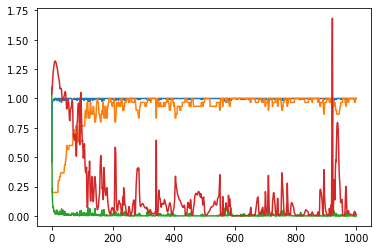

In [17]:
import matplotlib.pyplot as plt
plt.plot(hy2.history['accuracy'])
plt.plot(hy2.history['val_accuracy'])
plt.plot(hy2.history['loss'])
plt.plot(hy2.history['val_loss'])

In [18]:
m2.evaluate(tt_x,tt_y)

1/1 [==============================] - 0s 12ms/step - loss: 0.0137 - accuracy: 1.0000


[0.013719005510210991, 1.0]